In [3]:
# C:\Users\yebel\Desktop\OPENCLASSROOMS\FORMATION_DATA_ANALYST\OPENCLASSROOMS_COURS\PROJET10
# PROJET10_DATA_ANALYSIS_OCR
# Changement du repertoire: A ne plus changer.
import os
os.chdir('C://Users//yebel//Desktop//OPENCLASSROOMS//FORMATION_DATA_ANALYST//OPENCLASSROOMS_COURS//PROJET10')

In [4]:
# 0- IMPORTATIONS DES LIBRAIRIES NECESSAIRES POUR L'ANALYSE DES DONNEES.

from functions_P6 import *
# Librairies de calcul:
import math
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as st

import sf_stats_inferentielles as sfsi
import sf_classification_acp as sfca
import sf_graphiques as sfg
import sf_modeles_regression as sfmr
import sf_modeles_classif_supervisee as sfmcs

# Libairies de representation graphique:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Librairies de la regression lineaire:
from statsmodels.formula.api import ols
from statsmodels.stats.diagnostic import het_white , normal_ad
from sklearn.linear_model import LinearRegression

from scipy.stats import t, shapiro
import scipy.stats as scs

# Options globales pour l'output display:
pd.options.display.float_format = "{:.3f}".format

In [5]:
# IMPORTATION  DES DONNEES.

#1-Training set.

Billets_df = pd.read_csv("DATA/billets.csv", sep = ';',)             

# visualisation de Billet_df: 6 variables quantitatives et une variable binaire.

Billets_df

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.810,104.860,104.950,4.520,2.890,112.830
1,True,171.460,103.360,103.660,3.770,2.990,113.090
2,True,172.690,104.480,103.500,4.400,2.940,113.160
3,True,171.360,103.910,103.940,3.620,3.010,113.510
4,True,171.730,104.280,103.460,4.040,3.480,112.540
...,...,...,...,...,...,...,...
1495,False,171.750,104.380,104.170,4.420,3.090,111.280
1496,False,172.190,104.630,104.440,5.270,3.370,110.970
1497,False,171.800,104.010,104.120,5.510,3.360,111.950
1498,False,172.060,104.280,104.060,5.170,3.460,112.250


In [6]:
# Informations du fichier Billet_df.

Billets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB


In [7]:
# Statistiques descriptives des variables quantitatives.

Billets_df.describe().T

# std de margin_low et length très au-dessus de la moyenne.

# première présomption de différence en les vrais des faux billets.

,count,mean,std,min,25%,50%,75%,max
diagonal,1500.000,171.958,0.305,171.040,171.750,171.960,172.170,173.010
height_left,1500.000,104.030,0.299,103.140,103.820,104.040,104.230,104.880
height_right,1500.000,103.920,0.326,102.820,103.710,103.920,104.150,104.950
margin_low,1463.000,4.486,0.664,2.980,4.015,4.310,4.870,6.900
margin_up,1500.000,3.151,0.232,2.270,2.990,3.140,3.310,3.910
length,1500.000,112.679,0.873,109.490,112.030,112.960,113.340,114.440


### I-VALEURS MANQUANTES ET LEUR REMPLACEMENT :REGRESSION LINEAIRE;

In [8]:
Billets_df.isna().any()

# Présence des Valeurs manquantes sur la variable: margin_low.

is_genuine      False
diagonal        False
height_left     False
height_right    False
margin_low       True
margin_up       False
length          False
dtype: bool

In [9]:
# A- Nombre de Valeurs Manquantes:

Billets_df.isna().sum()

# A-1: 37 valeurs manquantes dans la variable margin_low.

is_genuine       0
diagonal         0
height_left      0
height_right     0
margin_low      37
margin_up        0
length           0
dtype: int64

In [10]:
# A-2: Pourcentage des Valeurs Manquantes: 2.5%

Billets_df.isna().sum()/Billets_df.shape[0]

is_genuine     0.000
diagonal       0.000
height_left    0.000
height_right   0.000
margin_low     0.025
margin_up      0.000
length         0.000
dtype: float64

In [11]:
# A-3: Identification des lignes de la variable margin_low ayant des Valeurs Manquantes.

print(Billets_df.index[Billets_df.isnull().any(axis=1)])

Int64Index([  72,   99,  151,  197,  241,  251,  284,  334,  410,  413,  445,
             481,  505,  611,  654,  675,  710,  739,  742,  780,  798,  844,
             845,  871,  895,  919,  945,  946,  981, 1076, 1121, 1176, 1303,
            1315, 1347, 1435, 1438],
           dtype='int64')


In [12]:
# B- Régression linéaire.

# Enlèver les Valeurs Manquantes de Billets_df et considèrer le nouveau df comme Train dataset.

RegL_Train_df = Billets_df.dropna()

# Visualisation de RegL_Train_df.

RegL_Train_df

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.810,104.860,104.950,4.520,2.890,112.830
1,True,171.460,103.360,103.660,3.770,2.990,113.090
2,True,172.690,104.480,103.500,4.400,2.940,113.160
3,True,171.360,103.910,103.940,3.620,3.010,113.510
4,True,171.730,104.280,103.460,4.040,3.480,112.540
...,...,...,...,...,...,...,...
1495,False,171.750,104.380,104.170,4.420,3.090,111.280
1496,False,172.190,104.630,104.440,5.270,3.370,110.970
1497,False,171.800,104.010,104.120,5.510,3.360,111.950
1498,False,172.060,104.280,104.060,5.170,3.460,112.250


In [13]:
# Vérifier que RegL_Train_df est sans Valeurs Manquantes.

RegL_Train_df.isna().sum()

is_genuine      0
diagonal        0
height_left     0
height_right    0
margin_low      0
margin_up       0
length          0
dtype: int64

In [14]:
# Séparer les valeurs manquantes et considèrer le nouveau df comme test dataset.

test_data = Billets_df[Billets_df.isnull().any(axis=1)]

# Visualisation du fichier test_data.

test_data

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
72,True,171.940,103.890,103.450,NaN,3.250,112.790
99,True,171.930,104.070,104.180,NaN,3.140,113.080
151,True,172.070,103.800,104.380,NaN,3.020,112.930
197,True,171.450,103.660,103.800,NaN,3.620,113.270
241,True,171.830,104.140,104.060,NaN,3.020,112.360
251,True,171.800,103.260,102.820,NaN,2.950,113.220
284,True,171.920,103.830,103.760,NaN,3.230,113.290
334,True,171.850,103.700,103.960,NaN,3.000,113.360
410,True,172.560,103.720,103.510,NaN,3.120,112.950
413,True,172.300,103.660,103.500,NaN,3.160,112.950


In [15]:
# Creation de X_train dépuis RegL_Train_df.

X_train = RegL_Train_df.drop("margin_low", axis=1)

# Visualisation de X_train.

X_train

,is_genuine,diagonal,height_left,height_right,margin_up,length
0,True,171.810,104.860,104.950,2.890,112.830
1,True,171.460,103.360,103.660,2.990,113.090
2,True,172.690,104.480,103.500,2.940,113.160
3,True,171.360,103.910,103.940,3.010,113.510
4,True,171.730,104.280,103.460,3.480,112.540
...,...,...,...,...,...,...
1495,False,171.750,104.380,104.170,3.090,111.280
1496,False,172.190,104.630,104.440,3.370,110.970
1497,False,171.800,104.010,104.120,3.360,111.950
1498,False,172.060,104.280,104.060,3.460,112.250


In [16]:
# Creation de y_train dépuis RegL_Train_df.

y_train = RegL_Train_df["margin_low"]

# Visualisation de y_train.

y_train

0      4.520
1      3.770
2      4.400
3      3.620
4      4.040
        ... 
1495   4.420
1496   5.270
1497   5.510
1498   5.170
1499   4.630
Name: margin_low, Length: 1463, dtype: float64

In [17]:
# Vérification de la dimensionalité des variables du dataset train: RegL_Train_df.

X_train.shape, y_train.shape

((1463, 6), (1463,))

In [18]:
# Application de la Regression lineaire.

reg_lin = LinearRegression()

model_reg_lin = reg_lin.fit(X_train, y_train)

# Predictions:

x_train = RegL_Train_df[["is_genuine","diagonal","height_left","height_right", "margin_up", "length"]]

RegL_Train_df["margin_low_pred"] = reg_lin.predict(x_train)

<ipython-input-18-4ea8ca3e0efc>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  RegL_Train_df["margin_low_pred"] = reg_lin.predict(x_train)


In [19]:
# Afficher les coefficients estimés des paramètres de prévisions. 

print("Intercept:", model_reg_lin.intercept_)

print("Coéfficients:", model_reg_lin.coef_)

Intercept: 2.8668228920543415
Coéfficients: [-1.14059676 -0.0130159   0.02829069  0.02674982 -0.21284432 -0.00388299]


In [20]:
# Validation du modèle:

# Après avoir construit le modèle, il est important de valider ses performances.

# Instanciation:

reg_linb = smf.ols("margin_low ~ diagonal + height_left + height_right + margin_up + length", data = Billets_df)

# Calculs:

res_lin = reg_linb.fit()

print(res_lin.summary())

                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.477
Model:                            OLS   Adj. R-squared:                  0.476
Method:                 Least Squares   F-statistic:                     266.1
Date:                Mon, 09 May 2022   Prob (F-statistic):          2.60e-202
Time:                        11:37:11   Log-Likelihood:                -1001.3
No. Observations:                1463   AIC:                             2015.
Df Residuals:                    1457   BIC:                             2046.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       22.9948      9.656      2.382   

Modèle est globalement significatif: Prob (F-statistic) < 5%;                                    
Toutes les variables explicatives sont statistiquement significatives au seuil de 5%.            
Le coefficient de détermination est non satisfaisant: Adj. R-squared = 0.476 < 0.5               

Test d'hypothèses :Analyse des résidus de la  la régression linéaire.                            

1-TEST DE NORMALITE DES RESIDUS DE LA REGRESSION LINEAIRE.                                       

Prob(Omnibus)~0.000, ==>H0 non vérifiée.  Prob(Jacque-Bera) est redondant avec Prob(Omnibus).     

Test d'Aderson-Darling pour confirmation.

<ipython-input-21-4dfcb0b32214>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  RegL_Train_df["residual"] = RegL_Train_df["margin_low"] - RegL_Train_df["margin_low_pred"]


La p-value du test d'Aderson-Darling vaux 3.9857722331535204e-05


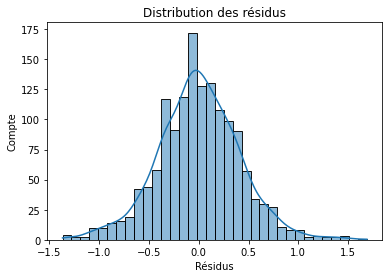

In [21]:
# Creation d'une colonne contenant les residus:

RegL_Train_df["residual"] = RegL_Train_df["margin_low"] - RegL_Train_df["margin_low_pred"]

# Normalite:

print("La p-value du test d'Aderson-Darling vaux", normal_ad(RegL_Train_df["residual"])[1])

# Graphique:

sns.histplot(RegL_Train_df["residual"], kde=True)
plt.xlabel("Résidus")
plt.ylabel("Compte")
plt.title("Distribution des résidus")
plt.savefig('Graphs/1-residus.png', transparent=True)
plt.show()

p-value < 5%, ==> Les résidus de la régression linéaire suivent bien une distribution normale.

{'Test Statistic': 109.8601519685901, 'p-value': 2.082824499042204e-14, 'F-Statistic': 5.853731207797142, 'F-Test p-value': 4.9748650928658e-15}


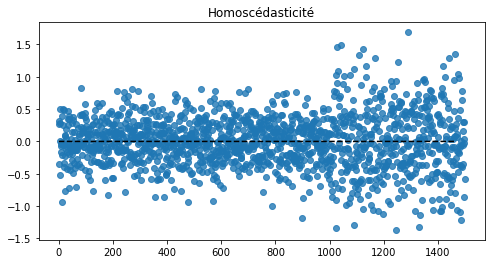

In [22]:
# 2-TEST DHOMOSCEDASTICITE: Test de White.

white_test = het_white(res_lin.resid, res_lin.model.exog)

labels_white_test = ["Test Statistic", "p-value", "F-Statistic", "F-Test p-value"]

print(dict(zip(labels_white_test, white_test)))

# Graphique:

plt.subplots(figsize=(8, 4))
plt.scatter(x=RegL_Train_df.index, y=RegL_Train_df["residual"], alpha=0.8)
plt.plot(np.repeat(0, len(RegL_Train_df.index)+2), color="black", linestyle='--')
plt.title("Homoscédasticité")
plt.savefig('Graphs/2-variance_cte.png', transparent=True)
plt.show()

F-Test p-value < 5%, ==> Constance de la variance de notre régression linéaire au seuil de 5%.

3-TEST D'AUTOCORRELATION DES RESIDUS DE LA REGRESSION LINEAIRE.

1.5 < Durbin-Watson =1.893 < 2.5 pas d'autocorrélation.

In [23]:
# 4-TEST DE MULTICOLINEARITE ENTRE LES REGRESSEURS.

vif= pd.Series([variance_inflation_factor(RegL_Train_df[["diagonal","height_left","height_right", "margin_up", "length"]].values, i)
               for i in range(RegL_Train_df[["diagonal","height_left","height_right", "margin_up", "length"]].shape[1])],
              index=RegL_Train_df[["diagonal","height_left","height_right", "margin_up", "length"]].columns)

print("VIF par features:\n", vif)

print("VIF moyen:",vif.mean())

# On est oblige d'enlever ''is_genuine'' puisque c'est une variables qualitative.

VIF par features:
 diagonal       170566.671
height_left    111895.310
height_right   100858.864
margin_up         261.969
length          22708.223
dtype: float64
VIF moyen: 81258.20741161003


Forte Multicolinéarité entre le regresseurs.

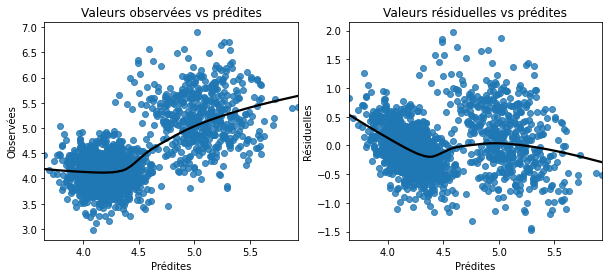

In [24]:
# TEST DE LINEARITE DU MODELE.

def linearity_test(model, y):
    '''
    Function for visually inspecting the assumption of linearity in a linear regression model.
    It plots observed vs. predicted values and residuals vs. predicted values.
    
    Args:
    * model - fitted OLS model from statsmodels
    * y - observed values
    '''
    fitted_vals = model.predict()
    resids = model.resid

    fig, ax = plt.subplots(1,2,figsize=(10,4))
    
    sns.regplot(x=fitted_vals, y=y, lowess=True, ax=ax[0], line_kws={'color': 'black'})
    ax[0].set_title("Valeurs observées vs prédites")
    ax[0].set(xlabel="Prédites", ylabel="Observées")

    sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[1], line_kws={'color': 'black'})
    ax[1].set_title("Valeurs résiduelles vs prédites")
    ax[1].set(xlabel="Prédites", ylabel="Résiduelles")
    plt.savefig('Graphs/3-Linéarité.png', transparent=True)
    plt.show()
linearity_test(res_lin, RegL_Train_df["margin_low"])

L'hypothèse de linéarité n'est pas vérifiée.

In [25]:
# ANALYSE DES VALEURS ATYPIQUERS ET/OU INFLUENTES.

# Identification des individus atypiques et influents (iai), preambulle:

student_resid = res_lin.get_influence().resid_studentized_external

# Calcul de la distance de Cook.

(cooks, p_val_cooks) = res_lin.get_influence().cooks_distance

# Différence d'estimation

(dffits, p_val_dffits) = res_lin.get_influence().dffits

# Calcul du leverage

leverage = res_lin.get_influence().hat_matrix_diag

C:\Users\yebel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


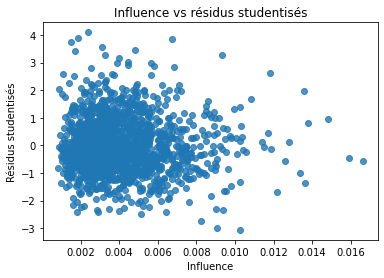

In [26]:
# Représentation Graphique:

sns.regplot(leverage, res_lin.resid_pearson, fit_reg=False)
plt.title("Influence vs résidus studentisés")
plt.xlabel("Influence")
plt.ylabel("Résidus studentisés")
plt.savefig('Graphs/4-res_student.png', transparent=True)
plt.show()

In [27]:
# Creation d'un dataframe de travail:

Viai_df = pd.concat([RegL_Train_df["margin_low"], res_lin.get_influence().summary_frame()], axis = 1)

#hat_diag = leverage donc on change le nom

Viai_df = Viai_df.rename(columns={"hat_diag": "leverage"})                                               

# Visualisation du fichier Viai_df.

Viai_df

,margin_low,dfb_Intercept,dfb_diagonal,dfb_height_left,dfb_height_right,dfb_margin_up,dfb_length,cooks_d,standard_resid,leverage,dffits_internal,student_resid,dffits
0,4.520,0.038,0.011,-0.041,-0.051,0.028,-0.018,0.001,-0.564,0.017,-0.073,-0.563,-0.073
1,3.770,-0.048,0.032,0.041,0.007,0.006,0.006,0.001,-0.770,0.006,-0.060,-0.770,-0.060
2,4.400,-0.029,0.034,0.028,-0.020,-0.011,-0.001,0.000,0.572,0.008,0.052,0.572,0.052
3,3.620,-0.032,0.061,0.001,-0.016,0.006,-0.030,0.001,-1.119,0.004,-0.075,-1.119,-0.075
4,4.040,-0.026,0.021,-0.027,0.056,-0.049,-0.010,0.001,-1.121,0.006,-0.084,-1.121,-0.084
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,4.420,-0.013,0.025,-0.035,-0.009,0.059,0.068,0.002,-1.609,0.004,-0.106,-1.610,-0.106
1496,5.270,0.014,-0.009,-0.014,-0.007,0.003,0.012,0.000,-0.390,0.006,-0.029,-0.390,-0.029
1497,5.510,0.015,-0.014,-0.014,0.010,0.018,-0.012,0.000,1.269,0.002,0.051,1.270,0.052
1498,5.170,-0.013,0.007,0.011,0.000,0.023,0.006,0.000,0.753,0.002,0.036,0.753,0.036


influence.resid_studentized_external : permettent de détecter les valeurs aberrantes.

influence.cooks_distance : Estime l'influence d'une donnée par usage des moindres carrés.

influence.dffits : diagnostique l'influence d'un point dans une régression.

influence.hat_matrix_diag : Matrice qui décrit l'influence de chaque valeur dépendante sur        
chaque valeur estimée. Sa diagonale correspond aux 'leverages',qui décrivent l'influence de      
chaque valeur sur l'estimation pour la même observation.                                         

influence.resid_studentized_external : permettent de détecter les valeurs aberrantes.

influence.cooks_distance : Estime l'influence d'une donnée par usage des moindres carrés.

influence.dffits : diagnostique l'influence d'un point dans une régression.

influence.hat_matrix_diag : Matrice qui décrit l'influence de chaque valeur dépendante sur        
chaque valeur estimée. Sa diagonale correspond aux 'leverages',qui décrivent l'influence de      
chaque valeur sur l'estimation pour la même observation.                                         

In [28]:
# Studentisation des residus:

std_res = Viai_df.student_resid

print ("résidus studentisés:\n", std_res.describe())

# Individus atypiques:

outlier = pd.DataFrame((Viai_df["margin_low"][abs(std_res) > 2]))

print(outlier.count())

résidus studentisés:
 count   1463.000
mean       0.000
std        1.001
min       -3.088
25%       -0.661
50%       -0.087
75%        0.570
max        4.127
Name: student_resid, dtype: float64
margin_low    72
dtype: int64


Nous trouvons 72 individus atypiques (résidus studentisés > 2 en valeur absolue),                 
Mais ne supprimer les outliers que s'ils sont influents, c'est-à-dire au-dessus du seuil:
(2*k) +2/n avec k = nombre de variables explicatives et n = nombre d'observations.

In [29]:
# Identification des individus a forte influence:

# k = nombre de variables predictives pour la regression lineaire +1 si on a une constante.

k_reg_lin = 5               

# n = nombre d'observations.

n_reg_lin = 1500                                    

#=0.047 Seuil (threshold), toutes valeurs au dessus aura une forte influence.

lev_thr = ((2*k_reg_lin)+2)/n_reg_lin               

# Impression.

print(Viai_df["leverage"].describe())

hg_leverage = Viai_df["margin_low"][abs(Viai_df["leverage"]) > lev_thr]

# Impression.

print("nombre d'individus à forte influence:", hg_leverage.count())

count   1463.000
mean       0.004
std        0.002
min        0.001
25%        0.003
50%        0.004
75%        0.005
max        0.017
Name: leverage, dtype: float64
nombre d'individus à forte influence: 79


Recoupons les individus atypiques et influents pour identifier ceus individus ayant un impact 
sur la régression linéaire.

In [30]:
# Identification des individus atypiques a forte influence:

outliers_hg_lev =pd.merge(outlier,hg_leverage, left_index=True, right_index=True)

# AFFICHER:

print(outliers_hg_lev.count())

print(outliers_hg_lev)

margin_low_x    7
margin_low_y    7
dtype: int64
      margin_low_x  margin_low_y
664          5.040         5.040
965          3.450         3.450
1074         4.360         4.360
1089         3.860         3.860
1199         4.490         4.490
1329         3.820         3.820
1478         6.080         6.080


Il existent 7 individus à la fois influents et atypiques. Supprimons-les 
et relançons la régression linéaire.

In [31]:
# Suppression des Viai:

Billet_sans_Viai_df = Billets_df.drop(outliers_hg_lev.index)

# Instanciation:

reg_lin_c = smf.ols("margin_low ~ diagonal + height_left + height_right + margin_up + length", data = Billet_sans_Viai_df)

# Calculs:

model_reg_lin_b = reg_lin_c.fit()

print(model_reg_lin_b.summary())

                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.491
Method:                 Least Squares   F-statistic:                     282.2
Date:                Mon, 09 May 2022   Prob (F-statistic):          5.39e-211
Time:                        11:38:45   Log-Likelihood:                -972.21
No. Observations:                1456   AIC:                             1956.
Df Residuals:                    1450   BIC:                             1988.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       24.2866      9.516      2.552   

En termes de comparaison, nous avons:                                                            

Le R² augmente de 0.47 à 0.49.                                                                   

La F-stat passe de 2661 à 2822 avec un changement d'ordre de grandeur de la Prob de -202 à -211.  

L'AIC passe de 2015 à 1956.                                                                      

Le BIC de 2046 à 1998.                                                                           

Le log diminue de -1001.3 à -972.21.                                                             

Les coefficients et leurs statistiques restent eux globalement inchangés.                        

Le nombre d'individus influents et atypiques est faible (7/1463), ils n'influencent  

finalement pas tant le jeu de données et leur suppression n'apporte pas beaucoup au modèle.       

La décision est prise de continuer avec eux tout en gardant leur présence à l'esprit.             
Il est toujours possible d'utiliser, si nécessaire, Billets_sans_Viai_df à 
la place de  Billet_df.

In [32]:
# C- Application du modele sur les donnees test.

x_test = test_data[["is_genuine","diagonal","height_left","height_right", "margin_up","length"]]

test_data["margin_low"] = reg_lin.predict(x_test)

# Visualisation de test_data.

test_data

<ipython-input-32-0d2c9f34f833>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data["margin_low"] = reg_lin.predict(x_test)


,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
72,True,171.940,103.890,103.450,4.065,3.250,112.790
99,True,171.930,104.070,104.180,4.112,3.140,113.080
151,True,172.070,103.800,104.380,4.134,3.020,112.930
197,True,171.450,103.660,103.800,3.994,3.620,113.270
241,True,171.830,104.140,104.060,4.140,3.020,112.360
251,True,171.800,103.260,102.820,4.094,2.950,113.220
284,True,171.920,103.830,103.760,4.074,3.230,113.290
334,True,171.850,103.700,103.960,4.125,3.000,113.360
410,True,172.560,103.720,103.510,4.081,3.120,112.950
413,True,172.300,103.660,103.500,4.074,3.160,112.950


In [33]:
# D- Créer une nouvelle liste et imputer les valeurs trouvées.

Billets_df_new = Billets_df.copy()

# Imputation des valeurs trouvées.

Billets_df_new.loc[test_data.index.tolist(), 'margin_low'] = test_data['margin_low']

# Visualisation du nouveau fichier augmenté des valeurs trouvées.

Billets_df_new

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.810,104.860,104.950,4.520,2.890,112.830
1,True,171.460,103.360,103.660,3.770,2.990,113.090
2,True,172.690,104.480,103.500,4.400,2.940,113.160
3,True,171.360,103.910,103.940,3.620,3.010,113.510
4,True,171.730,104.280,103.460,4.040,3.480,112.540
...,...,...,...,...,...,...,...
1495,False,171.750,104.380,104.170,4.420,3.090,111.280
1496,False,172.190,104.630,104.440,5.270,3.370,110.970
1497,False,171.800,104.010,104.120,5.510,3.360,111.950
1498,False,172.060,104.280,104.060,5.170,3.460,112.250


In [34]:
# Vérifier que Billets_df_new est sans Valeurs Manquantes.

Billets_df_new.isna().sum()

is_genuine      0
diagonal        0
height_left     0
height_right    0
margin_low      0
margin_up       0
length          0
dtype: int64

In [35]:
# Exporter le fichier final datasf sous forme csv. 

Billets_df_new.to_csv(path_or_buf='C://Users//yebel//Desktop//OPENCLASSROOMS//FORMATION_DATA_ANALYST//OPENCLASSROOMS_COURS//PROJET10//DATA//dataf.csv', index=True)

## II- ANALYSE DESCRIPTIVE DES DONNEES.

II-1 Analyse univariée.

Nombre de lignes et de colonnes : 1 500 lignes et 7 colonnes.                                    
Type de variables : 
   1-is_genuine: binaire; 
   2-diagonal, height_left, height_right, margin_low, margin_up, length: quantitatives.

In [36]:
# Informations du fichier Billets_df_new.

Billets_df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1500 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB


II-2 REPARTITION DES DIMENSIONS DES BILLETS.

In [37]:
description = Billets_df_new.groupby('is_genuine').describe().T

# Visualisation.

print(description)

is_genuine           False    True 
diagonal     count 500.000 1000.000
             mean  171.901  171.987
             std     0.307    0.300
             min   171.040  171.040
             25%   171.690  171.790
             50%   171.910  171.990
             75%   172.093  172.200
             max   173.010  172.920
height_left  count 500.000 1000.000
             mean  104.190  103.949
             std     0.224    0.300
             min   103.510  103.140
             25%   104.040  103.740
             50%   104.180  103.950
             75%   104.332  104.140
             max   104.880  104.860
height_right count 500.000 1000.000
             mean  104.144  103.809
             std     0.271    0.292
             min   103.430  102.820
             25%   103.950  103.610
             50%   104.160  103.810
             75%   104.320  104.000
             max   104.950  104.950
margin_low   count 500.000 1000.000
             mean    5.216    4.116
             std     0.549  

Portrait du vrai billet (is_genuine : True)                                                       

Diagonal (Diagonale)                                             : 171.987 mm,                   
height_left (Hauteur mesurée à gauche)                           : 103.949 mm,                   
height_right (Hauteur mesurée à droite)                          : 103.809 mm,                   
margin_low (Marge entre le bord inférieur et le bord de l'image) :   4.116 mm,                   
margin_up (Marge entre le bord supérieur et le bord de l'image)  :   3.052 mm,                   
length (Longueur)                                                : 113.202 mm,                   


Portrait du faux billet (is_genuine : False)                                                     

Diagonal (Diagonale)                                             : 171.901 mm,                   
height_left (Hauteur mesurée à gauche)                           : 104.190 mm,                   
height_right (Hauteur mesurée à droite)                          : 104.144 mm,                   
margin_low (Marge entre le bord inférieur et le bord de l'image) :   5.216 mm,                   
margin_up (Marge entre le bord supérieur et le bord de l'image)  :   3.350 mm,                   
length (Longueur)                                                : 111.631 mm,                   

In [38]:
# Statistiques Descriptives de Fichier Billets_df_new.

Billets_df_new.describe().T

# std de margin_low et length très au-dessus de la moyenne. Première presomption de différence
# entre les vrais et les faux billets.

,count,mean,std,min,25%,50%,75%,max
diagonal,1500.000,171.958,0.305,171.040,171.750,171.960,172.170,173.010
height_left,1500.000,104.030,0.299,103.140,103.820,104.040,104.230,104.880
height_right,1500.000,103.920,0.326,102.820,103.710,103.920,104.150,104.950
margin_low,1500.000,4.483,0.660,2.980,4.027,4.310,4.870,6.900
margin_up,1500.000,3.151,0.232,2.270,2.990,3.140,3.310,3.910
length,1500.000,112.679,0.873,109.490,112.030,112.960,113.340,114.440


In [39]:
# Représentation des effectifs par type de billet vrai/faux (méthode utilisée .value_counts())

effectif = Billets_df_new['is_genuine'].value_counts()

# L'index de 'effectifs' contient les modalités.

modalite = effectif.index 

# Création du tableau des effectifs à partir des modalités de billets.

tabeff = pd.DataFrame(modalite, columns = ['is_genuine']) 

# Valeurs des effectifs.

tabeff["n"] = effectif.values

# La proportion des modalités, avec len(Billets_df_new) la taille de l'échantillon.

tabeff["f"] =  tabeff["n"] / len(Billets_df_new)

# Arrondir à 3 chiffres après la virgule.

tabeff      =  round(tabeff ,3)

# Visualisation du tableau des effectifs par modalités des billets.

tabeff   

,is_genuine,n,f
0,True,1000,0.667
1,False,500,0.333


            diagonal  height_left  height_right  margin_low  margin_up  length
is_genuine                                                                    
False            500          500           500         500        500     500
True            1000         1000          1000        1000       1000    1000


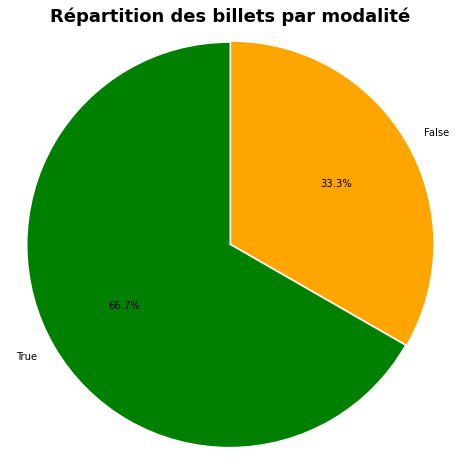

In [40]:
# Repartition des vrais/faux billets du fichier Billets_df_new.

print(Billets_df_new.groupby(["is_genuine"]).count())

# Création d'un graphique Pie Chart pour représenter la part de chaque type de billets.

labels = 'True', 'False'
sizes = tabeff['f']
explode = (0.01, 0)

fig1, ax = plt.subplots(figsize=(8,8))
ax.pie(sizes, explode=explode, labels=labels, colors=['green','orange'], 
        autopct='%1.1f%%', shadow=False, startangle=90)

ax.axis('equal') 
plt.title('Répartition des billets par modalité', fontsize= 18, fontweight="bold")

plt.savefig('Graphs/5-piechart.png')
plt.show()

III-NOMBRE DE VRAIS/FAUX BILLETS

In [41]:
# Fichier Billets_df_new en fonction des vrais billets.

Bvrais  =  Billets_df_new.loc[Billets_df_new['is_genuine'].isin([True]),:]

# Visualisation du fichier Bvrais.

Bvrais

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.810,104.860,104.950,4.520,2.890,112.830
1,True,171.460,103.360,103.660,3.770,2.990,113.090
2,True,172.690,104.480,103.500,4.400,2.940,113.160
3,True,171.360,103.910,103.940,3.620,3.010,113.510
4,True,171.730,104.280,103.460,4.040,3.480,112.540
...,...,...,...,...,...,...,...
995,True,171.660,103.920,103.470,4.260,2.830,113.200
996,True,172.160,103.720,103.610,4.300,2.720,113.510
997,True,171.780,103.380,104.220,4.230,3.070,113.770
998,True,171.440,103.960,103.920,3.680,2.890,113.210


In [42]:
# Effectif de Bvrais.

Bvrais.count()

is_genuine      1000
diagonal        1000
height_left     1000
height_right    1000
margin_low      1000
margin_up       1000
length          1000
dtype: int64

In [43]:
# Statistiques descriptives du fichier Bvrais.

Bvrais.describe().T

,count,mean,std,min,25%,50%,75%,max
diagonal,1000.000,171.987,0.300,171.040,171.790,171.990,172.200,172.920
height_left,1000.000,103.949,0.300,103.140,103.740,103.950,104.140,104.860
height_right,1000.000,103.809,0.292,102.820,103.610,103.810,104.000,104.950
margin_low,1000.000,4.116,0.315,2.980,3.910,4.111,4.330,5.040
margin_up,1000.000,3.052,0.186,2.270,2.930,3.050,3.180,3.740
length,1000.000,113.202,0.360,111.760,112.950,113.205,113.460,114.440


Alors dans le modèle global, margin_low et length avaient des std > à la moyenne;                
Ici, toutes les std ont la même tendance. qu'en sera-t-il des faux billets?

In [44]:
# Fichier Billets_df_new en fonction des faux billets.

Bfaux  =  Billets_df_new.loc[Billets_df_new['is_genuine'].isin([False]),:]

# Visualisation du fichier Bfaux.

Bfaux

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
1000,False,172.280,103.950,103.910,4.780,3.310,111.400
1001,False,171.920,103.860,104.300,4.960,3.130,111.290
1002,False,171.590,104.140,104.380,4.970,3.470,111.220
1003,False,172.020,104.330,104.330,5.190,3.210,111.990
1004,False,172.550,104.250,104.230,5.600,3.130,111.720
...,...,...,...,...,...,...,...
1495,False,171.750,104.380,104.170,4.420,3.090,111.280
1496,False,172.190,104.630,104.440,5.270,3.370,110.970
1497,False,171.800,104.010,104.120,5.510,3.360,111.950
1498,False,172.060,104.280,104.060,5.170,3.460,112.250


In [45]:
# Effectif de Bfaux.

Bfaux.count()

is_genuine      500
diagonal        500
height_left     500
height_right    500
margin_low      500
margin_up       500
length          500
dtype: int64

In [46]:
# Statistiques descriptives du fichier Bfaux.

Bfaux.describe().T

,count,mean,std,min,25%,50%,75%,max
diagonal,500.000,171.901,0.307,171.040,171.690,171.910,172.093,173.010
height_left,500.000,104.190,0.224,103.510,104.040,104.180,104.332,104.880
height_right,500.000,104.144,0.271,103.430,103.950,104.160,104.320,104.950
margin_low,500.000,5.216,0.549,3.820,4.840,5.195,5.590,6.900
margin_up,500.000,3.350,0.180,2.920,3.220,3.350,3.473,3.910
length,500.000,111.631,0.616,109.490,111.200,111.630,112.030,113.850


std_margin_low et std_length supérieurs à la moyenne.                                            

Bvrais et Bfaux se distinguent par les margin_low et length 
comme constatées dans les statistiques générales.

In [47]:
# Affichons la distribution de chaque variable quantitative pour une vérification graphique.

def var_hist(var, i):
    subset = Billets_df_new[var]
    n_Billets_df_new = len(Billets_df_new)
    # Détermination de la moyenne.
    xbar = np.mean(Billets_df_new[var]) 
    # Détermination de l'écart-type.
    sprime = np.std(Billets_df_new[var], ddof=1) 
    # Détermination de la Variance non biaisée.
    sprime2 = np.var(Billets_df_new[var], ddof=1) 
    # Représentation graphique.
    ax = fig.add_subplot(i)
    ax.hist(subset, density=True)
    ax.axvline(xbar, color='r', linewidth=2, label="Moyenne empirique")
    bins = np.arange(Billets_df_new[var].min(),Billets_df_new[var].max(),0.05)
    y = scs.norm.pdf(bins, xbar, sprime)
    ax.plot(bins, y, '--', label="Densité normale")
    ax.legend()
    ax.set_xlabel(var, fontsize=12)
    ax.set_ylabel('Densité', fontsize=12)
    ax.set_title('Distribution de '+str(var), fontsize=18, fontweight="bold")

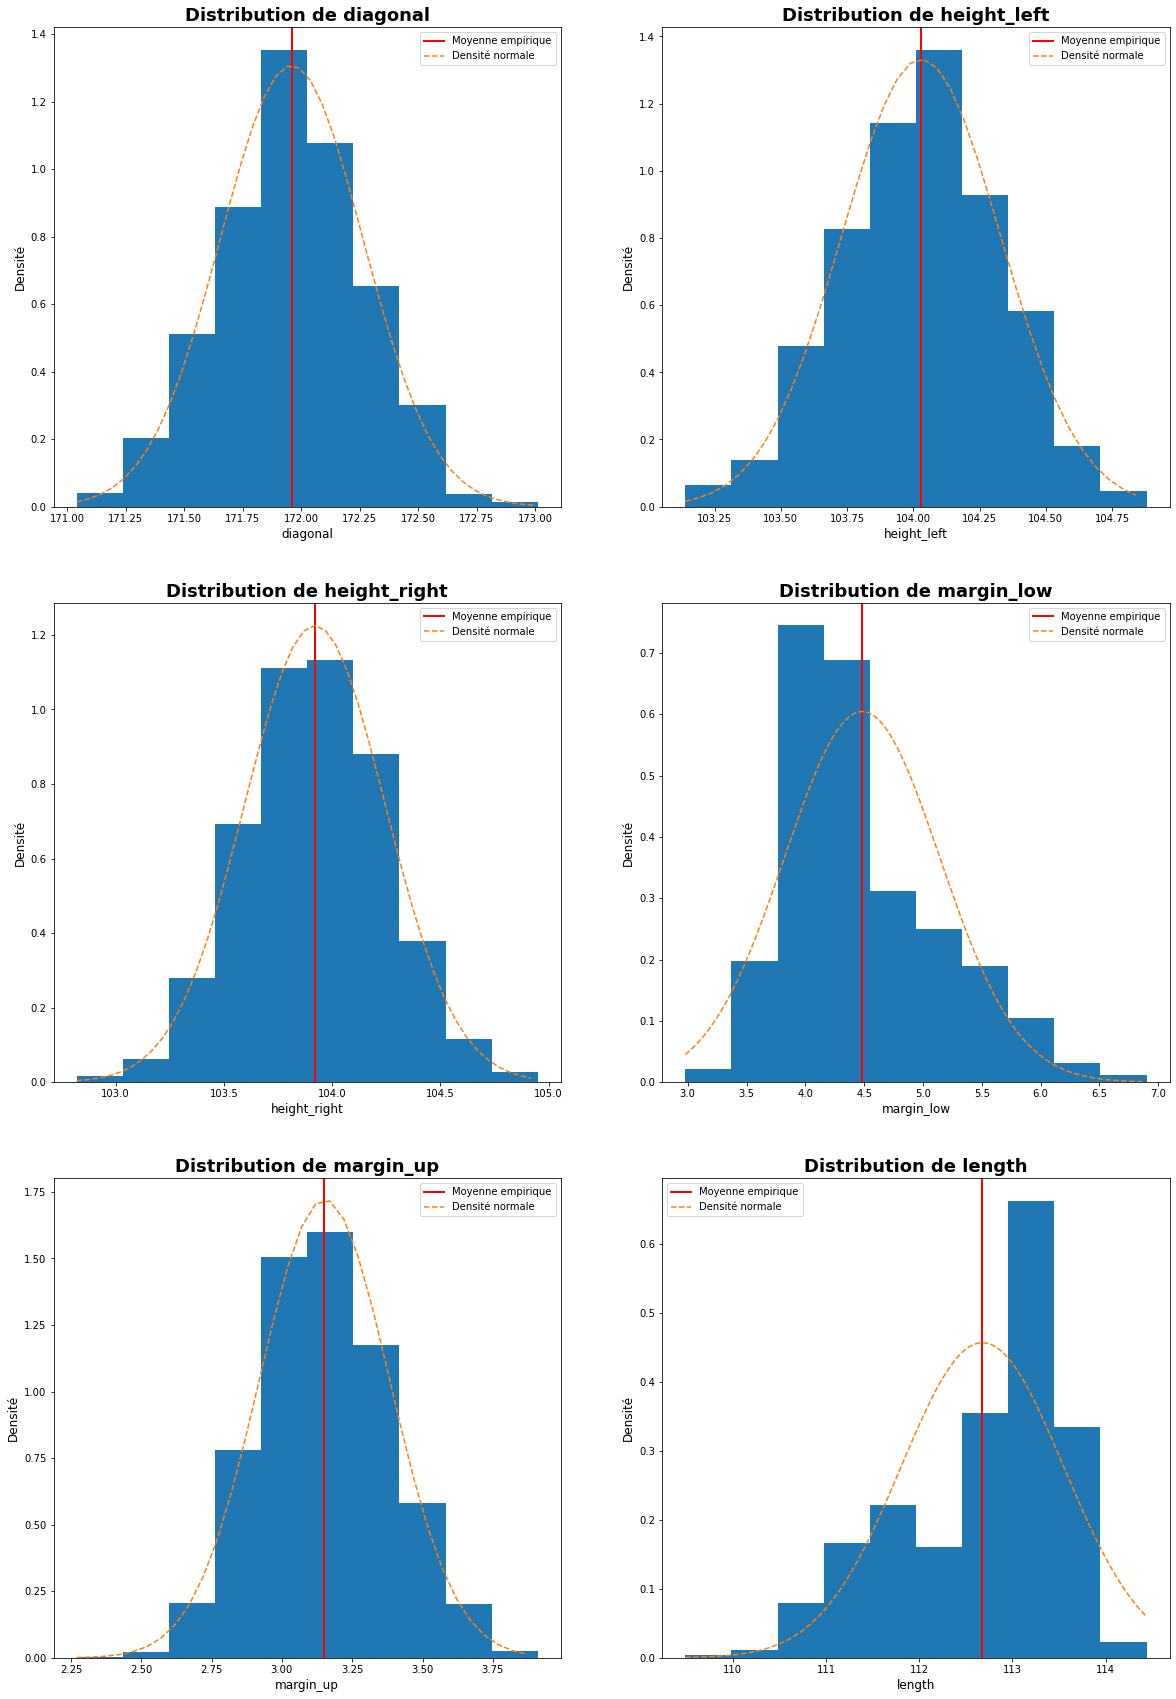

In [48]:
liste_var = ["diagonal","height_left","height_right","margin_low","margin_up","length"]

fig = plt.figure(figsize=(20,30),constrained_layout=False)
i = 321
for var in liste_var :
    var_hist(var, i)
    i+=1
fig.savefig('graphs/6-DESCRIBE_distributions_variables_1.png')

In [49]:
# Test d'Adéquation de la Loi Normale.

liste_var = liste_var
for var in liste_var :
    print(var,":",scs.ks_2samp(Billets_df_new[var],list(np.random.normal(np.mean(Billets_df_new[var]), np.std(Billets_df_new[var]), 1000))))

diagonal : KstestResult(statistic=0.03666666666666667, pvalue=0.3888261319342299)
height_left : KstestResult(statistic=0.038, pvalue=0.3456109606038896)
height_right : KstestResult(statistic=0.059, pvalue=0.029822392899105266)
margin_low : KstestResult(statistic=0.112, pvalue=5.365456999806284e-07)
margin_up : KstestResult(statistic=0.057, pvalue=0.039440614925718154)
length : KstestResult(statistic=0.139, pvalue=1.4944634418867508e-10)


Grâce au test de Kolmogorov-Smirnov réalisé ci-dessus, les Pvalues ne permettent pas de rejetter Au seuil de 1%, l'hypothèse gaussienne sur les variables suivantes:                              diagonal, height_left, height_right, margin_up.                                                   
 
Par contre, le même test de Kolmogorov-Smirnov au seuil de 1%, rejette l'hypothèse de la loi normale des variables: margin_low et length. C'est ce que semblent confirmer également les         histogrammes.

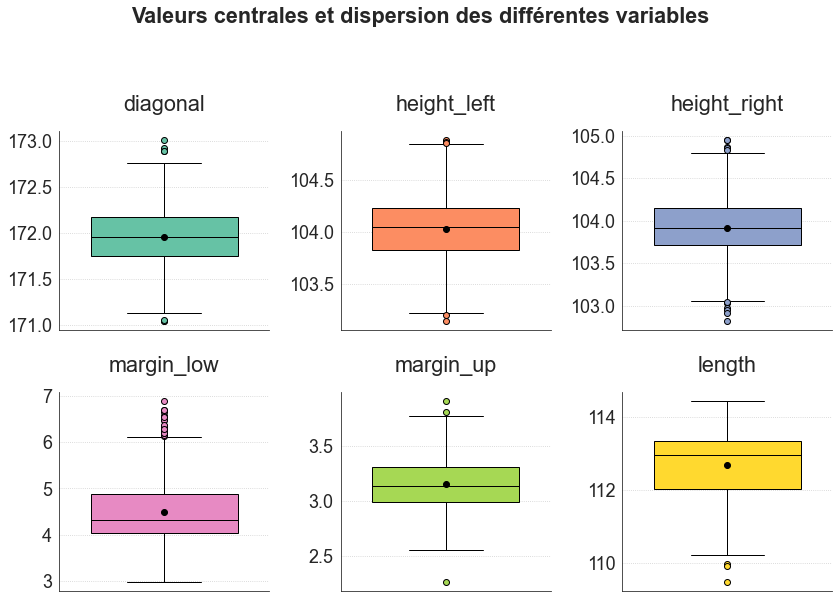

In [50]:
# Boxplot avec les valeurs centrales et les dispersions pour chaque variable quantitative.

graph02b = sfg.MyGraph("Valeurs centrales et dispersion des différentes variables", nblin=2, nbcol=3, figsize=(12,8), is_mono=False)
for cpt in np.arange(len(Billets_df_new.columns[1:])):
    valeurs = Billets_df_new[Billets_df_new.columns[cpt+1]].values
    cat_labels = [""]
    graph02b.add_boxplot(valeurs, cat_labels, means=True, vertical=True, subtitle=Billets_df_new.columns[cpt+1], multi_index=cpt+1)
fig, ax = graph02b.fig, graph02b.ax
plt.savefig("graphs/7-distrib_billets.png")
plt.show()

A partir des Boxplots ci-dessus on peut identifier quelques outliers, mais sans prendre en compte la nature du billet (Vrai/Faux).

In [51]:
# IV.2. Test de comparaison (ANOVA).

# Nous réalisons un test statistique afin de vérifier si la moyenne et la variance
# des vrais et faux billets diffèrent respectivement et de façon significative au seuil de 5%, 
# sur les 4 variables gaussiennes: diagonal, height_left, height_right, margin_up.

# Soient μ1 et μ2, les moyennes respectives des vrais et faux billets de chacune des 4 variables. 
# Soient σ1² et σ2², les variances respectives des vrais et faux billets de chacune des 4 variables.

# Hypothèses de test sur les moyennes:

#           H0: μ1 = μ2  

#           H1: μ1 ≠ μ2 

# Hypohèses de test sur les variances:

#           K0: σ1² = σ2²

#           K1: σ1² ≠ σ2²

In [52]:
# Test d'égalité des variances entre les vrais et faux billets.

vraisb = Billets_df_new[Billets_df_new.is_genuine==True][["diagonal","height_left","height_right","margin_up"]]
fauxb  = Billets_df_new[Billets_df_new.is_genuine==False][["diagonal","height_left","height_right","margin_up"]]

In [53]:
for cpt in np.arange(4):
    temp = sfsi.TwoSamples(vraisb[vraisb.columns[cpt]], fauxb[fauxb.columns[cpt]])
    print("Egalité des variances pour la variable {} : {}".format(vraisb.columns[cpt], temp.comment_variance_ratio_fishertest(short_comment=True)))

Egalité des variances pour la variable diagonal : Le test conclut que la variance de x est égale à la variance de y.
Egalité des variances pour la variable height_left : Le test conclut que la variance de x est différente de la variance de y.
Egalité des variances pour la variable height_right : Le test conclut que la variance de x est égale à la variance de y.
Egalité des variances pour la variable margin_up : Le test conclut que la variance de x est égale à la variance de y.


In [54]:
# Regardons le résultat détaillé pour height_left.

cpt = 1
temp = sfsi.TwoSamples(vraisb[vraisb.columns[cpt]], fauxb[fauxb.columns[cpt]])
print(temp.comment_variance_ratio_fishertest())

Test F de Fisher pour comparer les variances de deux échantillons de taille 1000 et 500.
On teste la statistique F = 1.8003276657426797 avec la loi de Fisher à 999 et 499 degrés de liberté.
Le ratio des deux variances est estimé à 1.8003276657426797 et est compris dans l'intervalle (1.5433065446198149, 2.0919536581184692) avec un niveau de confiance de 95.00%.
La p_value 0.000 est inférieure à alpha 0.050. L'hypothèse H0 que la variance de x est égale à la variance de y est rejetée avec un niveau de risque de 5.00%. Le test conclut que la variance de x est différente de la variance de y.


In [ ]:
# Test d'égalité des moyennes entre les vrais et faux billets.

for cpt in np.arange(4):
    if cpt != 1:
        temp = sfsi.TwoSamples(vraisb[vraisb.columns[cpt]], fauxb[fauxb.columns[cpt]], var_equal=True)
    else:
        temp = sfsi.TwoSamples(vraisb[vraisb.columns[cpt]], fauxb[fauxb.columns[cpt]], var_equal=False)
    print("Egalité des moyennes pour la variable {} : {}".format(vraisb.columns[cpt], temp.comment_mean_difference_ttest(short_comment=True)))

In [56]:
# Regardons plus en détail lorsque l'hypothèse d'égalité est rejetée :

for cpt in np.arange(1, 4):
    if cpt != 1:
        temp = sfsi.TwoSamples(vraisb[vraisb.columns[cpt]], fauxb[fauxb.columns[cpt]], var_equal=True)
    else:
        temp = sfsi.TwoSamples(vraisb[vraisb.columns[cpt]], fauxb[fauxb.columns[cpt]], var_equal=False)
    print("Variable {}\n{}\n".format(vraisb.columns[cpt], temp.comment_mean_difference_ttest()))

Variable height_left
Méthode = test t de Welch pour comparer les moyennes de deux échantillons avec des variances différentes.
On teste la statistique T = -17.48660281591907 avec la loi de Student à 1282.58 degrés de liberté.
La différence entre les moyennes de x et de y est estimée à -0.24120999999998105 et est comprise dans l'intervalle (-0.26827125794124657, -0.21414874205871554) avec un niveau de confiance de 95.00%.
La p_value 0.000 est inférieure à alpha 0.050. L'hypothèse H0 que la moyenne de x est égale à la moyenne de y est rejetée avec un niveau de risque de 5.00%. Le test conclut que la moyenne de x est différente de la moyenne de y.

Variable height_right
Méthode = test t de student pour comparer les moyennes de deux échantillons avec la même variance.
On teste la statistique T = -21.470310019402618 avec la loi de Student à 1498.00 degrés de liberté.
La différence entre les moyennes de x et de y est estimée à -0.3349699999999842 et est comprise dans l'intervalle (-0.3655731

Les différences de moyenne sont très nettes (p-value < 0.001).

En conclusion, les tests des 4 variables gaussiennes montrent que :

Variable diagonal:variance et moyenne identiques pour les vrais et faux billets.
Variable height_left:variance et moyenne différentes pour les vrais et faux billets.
Variable height_right:variance similaire, moyenne différente pour les vrais et les faux billets. Margin-up:variance similaire, moyenne différente pour les vrais et les faux billets.

Test non-paramétrique de Mann et Whitney sur margin_low et length non gaussiennes.               
Si leur distribution est considérée similaire pour les vrais et faux billets, 
considérer que leur médiane est égale pour les vrais et faux billets.

In [57]:
vraisb = Billets_df_new[Billets_df_new.is_genuine==True][["margin_low","length"]]
fauxb = Billets_df_new[Billets_df_new.is_genuine==False][["margin_low","length"]]
for col in vraisb.columns:
    temp = sfsi.TwoSamples(vraisb[col].values, fauxb[col].values)
    print("Variable {}\n{}\n".format(col, temp.comment_non_parametric_test()))

Variable margin_low
Test non paramétrique de Mann-Whitney pour les échantillons de taille 1000 et 500.
La statistique testée est U = 19355.000
La p_value 0.000 est inférieure à alpha 0.050. L'hypothèse que les deux échantillons ont une distribution similaire est rejetée avec un niveau de risque de 5.00%. Nous pouvons considérer que leurs médianes sont différentes.

Variable length
Test non paramétrique de Mann-Whitney pour les échantillons de taille 1000 et 500.
La statistique testée est U = 8021.500
La p_value 0.000 est inférieure à alpha 0.050. L'hypothèse que les deux échantillons ont une distribution similaire est rejetée avec un niveau de risque de 5.00%. Nous pouvons considérer que leurs médianes sont différentes.



Les vrais et faux billets sont distincts pour des variables margin_low et length.                

En forçant l'inégalité des variances, J'effectue le t-test égalité des moyennes plus précis
dans certains cas que le test de Mann-Whitney, pour confirmer mes premières conclusions.

In [58]:
for col in vraisb.columns:
    temp = sfsi.TwoSamples(vraisb[col].values, fauxb[col].values, var_equal=False)
    print("Variable {}\n{}\n".format(col, temp.comment_mean_difference_ttest()))

Variable margin_low
Méthode = test t de Welch pour comparer les moyennes de deux échantillons avec des variances différentes.
On teste la statistique T = -41.52324990962485 avec la loi de Student à 667.21 degrés de liberté.
La différence entre les moyennes de x et de y est estimée à -1.1001687222080614 et est comprise dans l'intervalle (-1.152192822780717, -1.0481446216354058) avec un niveau de confiance de 95.00%.
La p_value 0.000 est inférieure à alpha 0.050. L'hypothèse H0 que la moyenne de x est égale à la moyenne de y est rejetée avec un niveau de risque de 5.00%. Le test conclut que la moyenne de x est différente de la moyenne de y.

Variable length
Méthode = test t de Welch pour comparer les moyennes de deux échantillons avec des variances différentes.
On teste la statistique T = 52.77360271974254 avec la loi de Student à 673.98 degrés de liberté.
La différence entre les moyennes de x et de y est estimée à 1.5717899999999787 et est comprise dans l'intervalle (1.513310120498681, 

Cela confirme mon premier test.                                                                  

Résumé des tests statistiques :                                                                  
Les vrais et faux billets sont identiques du point de vue de la variable diagonal.
Ils diffèrent du point de vue des 5 autres variables:height_left,height_right,margin_low,margin_up,length. 

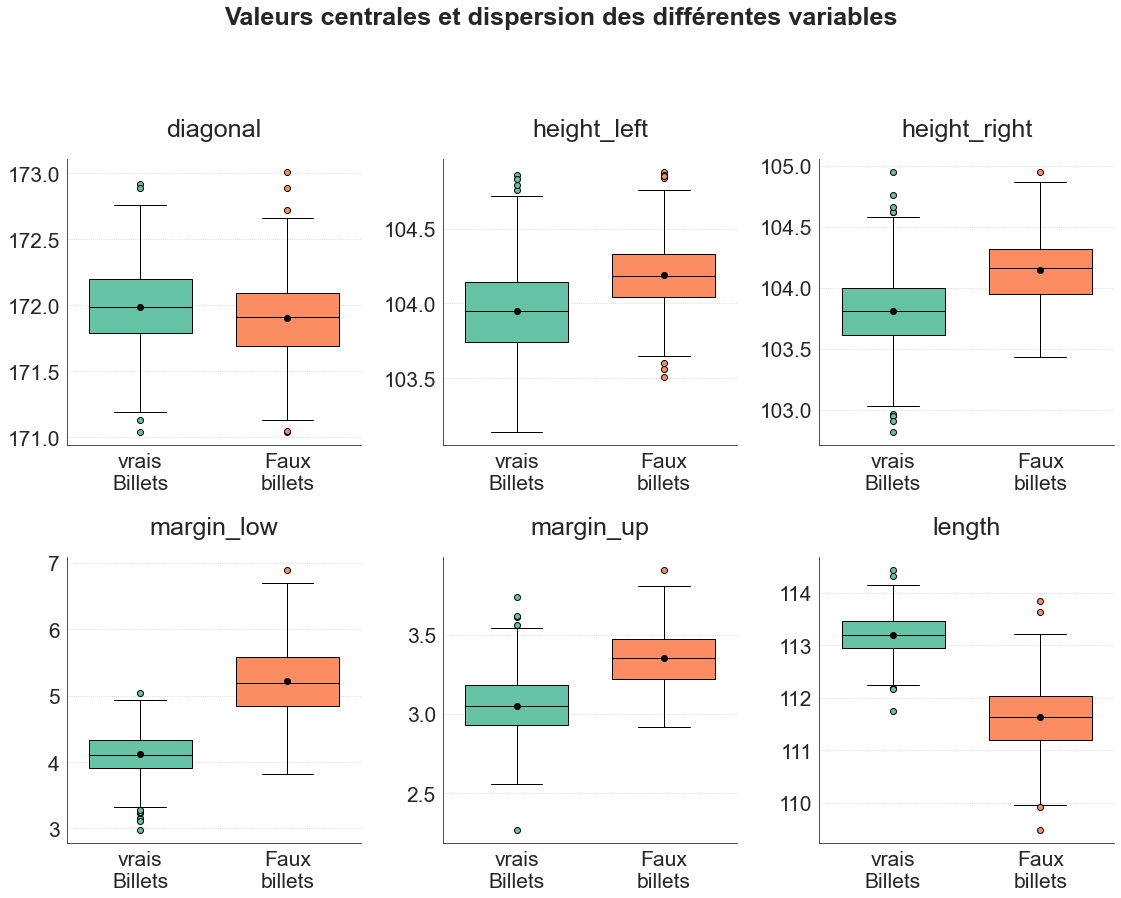

In [59]:
# L'approche Boxplot par variable selon la modalité du billet.

graph03b = sfg.MyGraph("Valeurs centrales et dispersion des différentes variables", nblin=2, nbcol=3, figsize=(16,12), is_mono=False)
for cpt in np.arange(len(Billets_df_new.columns[1:])):
    valeurs = [Billets_df_new[Billets_df_new.is_genuine==True][col].values, \
           Billets_df_new[Billets_df_new.is_genuine==False][col].values]
    valeurs = [Billets_df_new[Billets_df_new.is_genuine==True][Billets_df_new.columns[cpt+1]].values,
               Billets_df_new[Billets_df_new.is_genuine==False][Billets_df_new.columns[cpt+1]].values]
    cat_labels = ["vrais\nBillets","Faux\nbillets"]
    graph03b.add_boxplot(valeurs, cat_labels, color_base_index=0, means=True, vertical=True, subtitle=Billets_df_new.columns[cpt+1], multi_index=cpt+1)
fig, ax = graph03b.fig, graph03b.ax
plt.savefig("graphs/8-distrib_billets_separes.png")
plt.show()

Il apparaît de prime à bord :                                                                    

Les variables 'margin'(low et up) et 'height'(left et right) ont des moyennes et médianes plus
basses pour les vrais billets. La variable 'length' a une moyenne et médiane plus élèvées pour
les vrais billets. La variable 'diagonal' ne semble pas être significative.                      

Des outliers sont visibles, mais restent relativement proches des queues de distribution.
Ces valeurs restent totalement acceptables, elles ne semblent pas représenter d'erreurs 
particulières. Ces outliers seront conservés pour la suite de l'analyse.

IV-Analyse bivariée.

In [71]:
# Matrice des corrélations linéaires par l'utilisation de la méthode .corr()

# Billets_df_new.iloc[:, 1:].corr()

Billets_df_new.corr(method='pearson')

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
is_genuine,1.000,0.133,-0.380,-0.485,-0.786,-0.606,0.849
diagonal,0.133,1.000,0.019,-0.024,-0.111,-0.056,0.098
height_left,-0.380,0.019,1.000,0.242,0.309,0.247,-0.321
height_right,-0.485,-0.024,0.242,1.000,0.391,0.307,-0.402
margin_low,-0.786,-0.111,0.309,0.391,1.000,0.430,-0.668
margin_up,-0.606,-0.056,0.247,0.307,0.430,1.000,-0.521
length,0.849,0.098,-0.321,-0.402,-0.668,-0.521,1.000


Les coefficients de Pearson (r) ci-dessus nous montrent plusieures
corrélations linéaires  assez fortes :                                                           

length/margin_low      : -0.668321;                                                              

length/margin_up       : -0.520575;                                                               

is_genuine/length      : 0.849285;                                                               

is_genuine/margin_low  : -0.786082;                                                              

is_genuine/margin_up   : -0.606262.                                                              

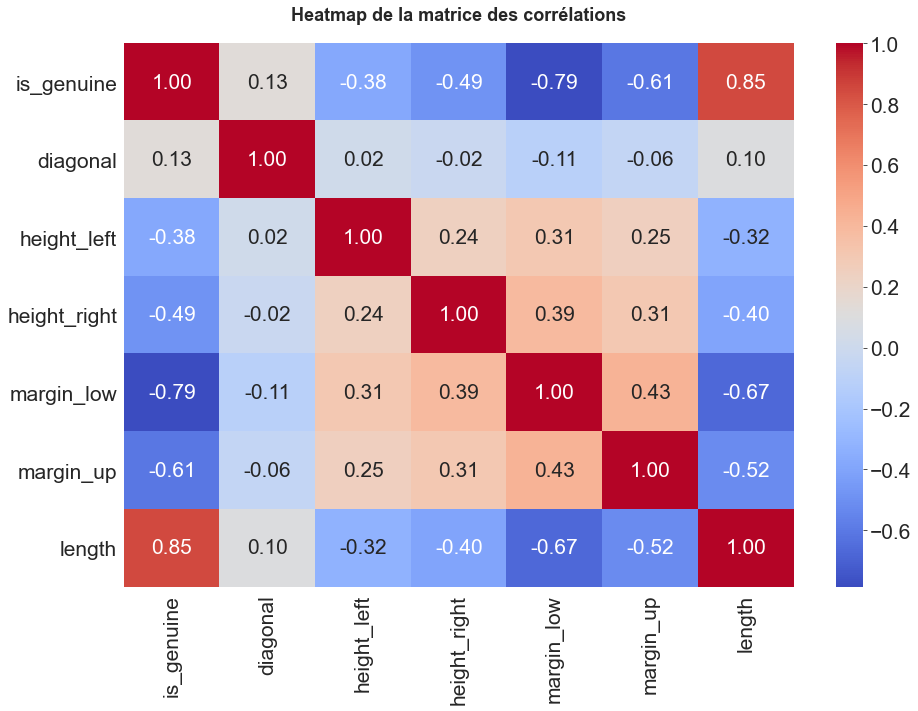

In [72]:
# HeatMap des corrélations linéaires à partir de la matrice précédente.

plt.figure(figsize=(15, 10))
sns.heatmap(Billets_df_new.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Heatmap de la matrice des corrélations', fontsize= 18, fontweight="bold")

plt.savefig("graphs/9-heatmap.png")
plt.show()

Des corrélations linéaires existent entre certaines de nos variables, voyons plus en détails.

Pairplot sur les variables 2 à 2 du fichier Billets_df_new.

Il permet de repérer les analyses bi-variées intéressantes à mener.

Ici la variable is_genuine est transformée en string, afin d'afficher les différentes

modalités (vrais ou faux) des billets.

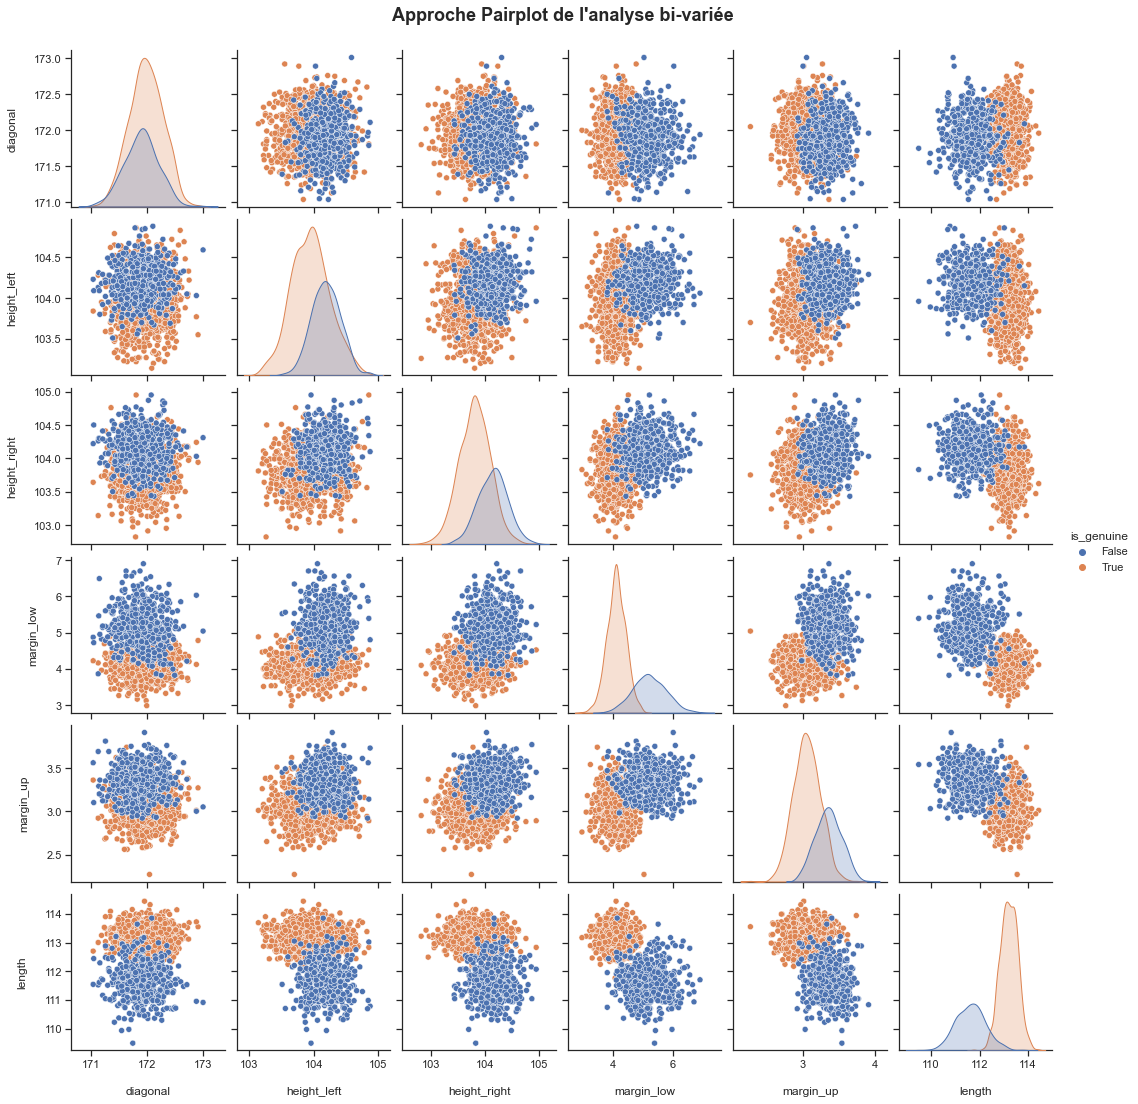

In [74]:
# Pairplot du fichier Billets_df_new.

sns.set(style="ticks")
sns.pairplot(Billets_df_new[["is_genuine","diagonal","height_left","height_right","margin_low","margin_up","length"]], hue="is_genuine")
plt.suptitle("Approche Pairplot de l'analyse bi-variée", y=1.025, fontsize= 18, fontweight="bold")
plt.savefig('graphs/10-pairplots.png')

Nous remarquons 2 groupes distincts pour chacune des variables, qui permettent 
de différencier les vrais et faux billets.                                                       

Les deux variables clés pour distinguer les vrais et faux billets semblent être:                 

Les variables length et margin_low.                                                              
En effet, les vrais et faux billets sont bien séparés par les analyses bi-variées qui
impliquent ces deux mesures et une autre mesure.                                                 
La variable margin_up permet aussi une différenciation, mais elle est moins nette.